# data prep

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/diabetes.csv")

# delete broken data
df = df.dropna(how='any',axis=0)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
OUTPUT_KEY = "Outcome"

X = df.drop(OUTPUT_KEY, axis=1).values
y = df[OUTPUT_KEY].values

[Text(0.5, 0, 'x_1 - Glucose'), Text(0, 0.5, 'x_5 - BMI')]

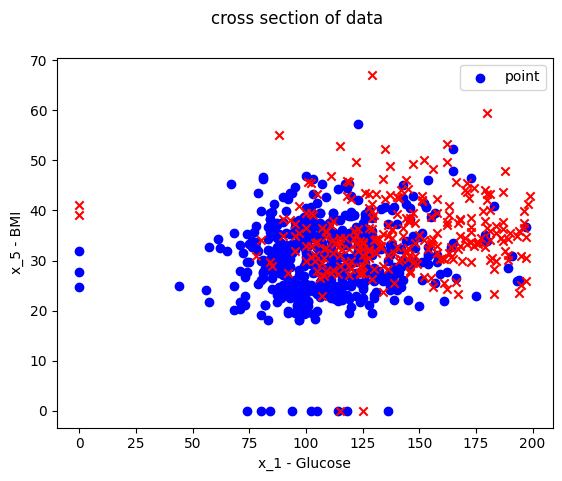

In [4]:
import matplotlib.pyplot as plt

i1 = 1
i2 = 5

X1 = X[:, i1]
X2 = X[:, i2]

# visualization
fig, axs = plt.subplots(1, 1)
fig.suptitle(f'cross section of data')
points1 = axs.scatter(X1[y==0], X2[y==0], c="b", marker="o")
points2 = axs.scatter(X1[y==1], X2[y==1], c="r", marker="x")
points1.set_label('point')
axs.legend()
axs.set(xlabel=f'x_{i1} - {df.columns.values[i1]}', ylabel=f'x_{i2} - {df.columns.values[i2]}')

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train

array([[  9.   , 145.   ,  80.   , ...,  37.9  ,   0.637,  40.   ],
       [ 10.   , 129.   ,  62.   , ...,  41.2  ,   0.441,  38.   ],
       [  7.   , 102.   ,  74.   , ...,  37.2  ,   0.204,  45.   ],
       ...,
       [ 13.   , 126.   ,  90.   , ...,  43.4  ,   0.583,  42.   ],
       [  4.   , 171.   ,  72.   , ...,  43.6  ,   0.479,  26.   ],
       [  9.   , 102.   ,  76.   , ...,  32.9  ,   0.665,  46.   ]])

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="default")
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [7]:
scaled_X_test

array([[ 0.98334907,  0.49936361,  0.22137443, ..., -0.754147  ,
         0.41446124,  1.55648438],
       [-0.83752176,  0.95190575, -0.56882966, ..., -0.74277424,
        -0.94288191, -0.95299549],
       [ 0.6798706 , -0.31521226, -0.56882966, ..., -0.86787462,
        -0.86457365, -0.52032655],
       ...,
       [ 1.28682754,  2.06817638,  0.44714703, ...,  1.73648772,
        -1.06469476,  0.86421407],
       [ 0.37639213,  0.49936361,  0.67291962, ..., -3.71106494,
         0.3941591 ,  3.11409258],
       [ 0.07291366, -0.88843231, -3.95541862, ..., -0.52669178,
         0.30714993, -0.17419139]])

# model

In [27]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid"),
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5)],
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

model.fit(scaled_X_train, y_train, epochs=100)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - binary_accuracy: 0.5569 - loss: 0.6789
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.6928 - loss: 0.5897
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.7743 - loss: 0.5099
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7559 - loss: 0.4992 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.7958 - loss: 0.4621
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7764 - loss: 0.4627
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.7695 - loss: 0.4558
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7988 - loss: 0.4506
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.8014 - loss: 0.4454 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7890 - loss: 0.4533 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.791

KeyboardInterrupt: 

In [ ]:
model.metrics_names

['loss', 'compile_metrics']

In [ ]:
model.evaluate(scaled_X_train, y_train, return_dict=True)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.9691 - loss: 0.1398


[0.14599330723285675, 0.9576547145843506]

In [ ]:
model.evaluate(scaled_X_test, y_test, return_dict=True)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - binary_accuracy: 0.7589 - loss: 0.7475


[0.8353880643844604, 0.7597402334213257]

In [ ]:
X_test.shape

(154, 8)

In [ ]:
X_test[0]

array([  7.   , 136.   ,  74.   ,  26.   , 135.   ,  26.   ,   0.647,
        51.   ])

In [ ]:
scaled_X_train.shape

(614, 8)

In [ ]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [ ]:
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

# choosing threshold

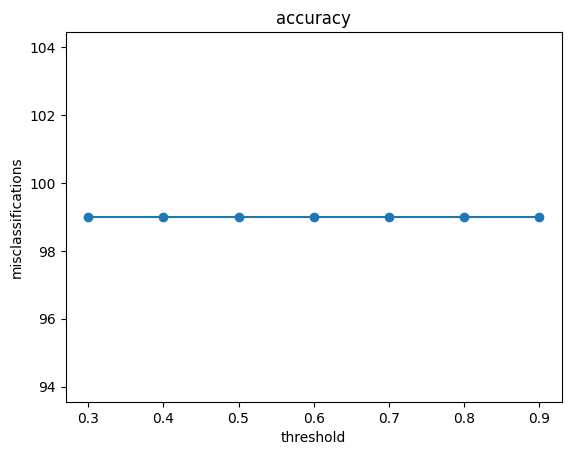

In [ ]:
THRESHOLD_RANGE = np.arange(0.3, 0.9, 0.1)
misclassifications = []

for THRESHOLD in THRESHOLD_RANGE:
    misclassifications.append(y_test[(y_pred.T[0] > THRESHOLD) != y_test].shape[0])

plt.plot(THRESHOLD_RANGE, misclassifications, marker='o')
plt.title('accuracy')
plt.xlabel('threshold')
plt.ylabel('misclassifications')
plt.show() 

doesn't seem like it changes anything, so the default is 0.5

# training approach 2: logistic regression
- for linear proportionalities between feature and output
- easier to understand 

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=1)
logreg.fit(scaled_X_train, y_train)

LogisticRegression(random_state=1)

In [ ]:
y_pred = logreg.predict(scaled_X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
print("accuracy:", len(y_pred[y_pred == y_test])/len(y_pred))

accuracy: 0.7792207792207793


unfortunately not better - probably due to the fact that non-linearity is present in the correlation in diabetes detection